In [11]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
#import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


In [12]:
sns.set_style("ticks")
sns.set_context("paper",font_scale=2.0)
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})

import matplotlib
import matplotlib.pyplot as plt
font = {'family': 'serif', 'serif': ['Gentium Basic'], 'size': 10}
plt.rc('font', **font)
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Gentium Basic'
matplotlib.rcParams['mathtext.it'] = 'Gentium Basic:italic'
matplotlib.rcParams['mathtext.bf'] = 'Gentium Basic:bold'

from matplotlib.backends.backend_pgf import FigureCanvasPgf
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)

pgf_with_custom_preamble = {
"font.family": "serif", # use serif/main font for text elements
"text.usetex": False,    # use inline math for ticks
"pgf.preamble": [
    "\\usepackage{mathpazo}",
    "\\usepackage{gentium}",
    "\\DeclareSymbolFont{sfnumbers}{T1}{gentium}{m}{n}",
    "\\SetSymbolFont{sfnumbers}{bold}{T1}{gentium}{bx}{n}",
    "\\DeclareMathSymbol{0}\mathalpha{sfnumbers}{\"30}",
    "\\DeclareMathSymbol{1}\mathalpha{sfnumbers}{\"31}",
    "\\DeclareMathSymbol{2}\mathalpha{sfnumbers}{\"32}",
    "\\DeclareMathSymbol{3}\mathalpha{sfnumbers}{\"33}",
    "\\DeclareMathSymbol{4}\mathalpha{sfnumbers}{\"34}",
    "\\DeclareMathSymbol{5}\mathalpha{sfnumbers}{\"35}",
    "\\DeclareMathSymbol{6}\mathalpha{sfnumbers}{\"36}",
    "\\DeclareMathSymbol{7}\mathalpha{sfnumbers}{\"37}",
    "\\DeclareMathSymbol{8}\mathalpha{sfnumbers}{\"38}",
    "\\DeclareMathSymbol{9}\mathalpha{sfnumbers}{\"39}",
    "\\DeclareMathSymbol{,}\mathalpha{sfnumbers}{\"2C}"
    ]
}
matplotlib.rcParams.update(pgf_with_custom_preamble)


In [68]:
data = pd.read_csv("clean_EU_new.csv")
data

,v1,date,region,g_retail_recreation,g_grocery_pharmacy,g_parks,g_transit_stations,g_workplaces,g_residential,apple_driving,...,g_residential_ma,apple_driving_ma,apple_transit_ma,apple_walking_ma,departure_ma,arrival_ma,total_flt_ma,departure_p_ma,arrival_p_ma,total_p_ma
0,0,2020-02-15,Austria,9,1.0,42.0,13,0.0,-2.0,158.950000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020-02-16,Austria,15,21.0,42.0,12,1.0,-2.0,120.220000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020-02-17,Austria,9,5.0,35.0,3,-4.0,0.0,113.560000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2020-02-18,Austria,8,5.0,40.0,2,-4.0,0.0,113.490000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2020-02-19,Austria,4,2.0,10.0,-1,-5.0,1.0,117.980000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8064,2811,2021-01-27,United Kingdom,-60,-21.0,-13.0,-63,-50.0,20.0,69.300003,...,18.000000,66.290001,37.660000,66.304283,433.57144,431.57144,865.14288,-0.821527,-0.822487,-0.822007
8065,2812,2021-01-28,United Kingdom,-61,-21.0,-12.0,-63,-50.0,20.0,71.010002,...,18.000000,66.574287,37.869999,66.497147,435.00000,433.28571,868.28571,-0.821159,-0.822240,-0.821699
8066,2813,2021-01-29,United Kingdom,-60,-16.0,-11.0,-61,-49.0,20.0,78.349998,...,17.857143,66.949997,37.991428,66.474289,430.57144,431.57144,862.14288,-0.823966,-0.823357,-0.823664
8067,2814,2021-01-30,United Kingdom,-67,-22.0,-37.0,-67,-33.0,15.0,68.309998,...,18.000000,67.232857,37.932858,65.567146,434.28571,434.85715,869.14288,-0.822692,-0.822209,-0.822453


In [77]:
data_use = data.drop(columns=['v1'])
data_use['date']=pd.to_datetime(data_use['date'])
data_use = data_use.set_index(['date'])
data_use

,region,g_retail_recreation,g_grocery_pharmacy,g_parks,g_transit_stations,g_workplaces,g_residential,apple_driving,apple_transit,apple_walking,...,g_residential_ma,apple_driving_ma,apple_transit_ma,apple_walking_ma,departure_ma,arrival_ma,total_flt_ma,departure_p_ma,arrival_p_ma,total_p_ma
date,,,,,,,,,,,,,,,,,,,,,
2020-02-15,Austria,9,1.0,42.0,13,0.0,-2.0,158.950000,NaN,165.310000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-16,Austria,15,21.0,42.0,12,1.0,-2.0,120.220000,NaN,113.750000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-17,Austria,9,5.0,35.0,3,-4.0,0.0,113.560000,NaN,125.350000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-18,Austria,8,5.0,40.0,2,-4.0,0.0,113.490000,NaN,127.470000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-19,Austria,4,2.0,10.0,-1,-5.0,1.0,117.980000,NaN,125.250000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-27,United Kingdom,-60,-21.0,-13.0,-63,-50.0,20.0,69.300003,38.439999,66.500000,...,18.000000,66.290001,37.660000,66.304283,433.57144,431.57144,865.14288,-0.821527,-0.822487,-0.822007
2021-01-28,United Kingdom,-61,-21.0,-12.0,-63,-50.0,20.0,71.010002,38.820000,67.160004,...,18.000000,66.574287,37.869999,66.497147,435.00000,433.28571,868.28571,-0.821159,-0.822240,-0.821699
2021-01-29,United Kingdom,-60,-16.0,-11.0,-61,-49.0,20.0,78.349998,39.270000,76.300003,...,17.857143,66.949997,37.991428,66.474289,430.57144,431.57144,862.14288,-0.823966,-0.823357,-0.823664


In [46]:
data_FR = data_use[data_use["region"] == "France"]
data_UK = data_use[data_use["region"] == "United Kingdom"]
data_GE = data_use[data_use["region"] == "Germany"]
data_IT = data_use[data_use["region"] == "Italy"]

In [47]:
data_FR['date']=pd.to_datetime(data_FR['date'])
data_FR = data_FR.set_index(['date'])
data_FR

/Users/cyl/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,region,g_retail_recreation,g_grocery_pharmacy,g_parks,g_transit_stations,g_workplaces,g_residential,apple_driving,apple_transit,apple_walking,...,g_residential_ma,apple_driving_ma,apple_transit_ma,apple_walking_ma,departure_ma,arrival_ma,total_flt_ma,departure_p_ma,arrival_p_ma,total_p_ma
date,,,,,,,,,,,,,,,,,,,,,
2020-02-15,France,-2,-1.0,23.0,12,-2.0,-1.0,126.610000,117.340000,126.340000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-16,France,6,2.0,9.0,7,-1.0,-1.0,96.709999,101.790000,74.440002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-17,France,1,2.0,16.0,-6,-15.0,4.0,100.320000,118.540000,86.900002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-18,France,5,2.0,36.0,-4,-14.0,3.0,100.830000,118.540000,95.910004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-19,France,-4,-3.0,18.0,-6,-12.0,2.0,102.030000,116.320000,94.029999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-27,France,-41,-12.0,-22.0,-35,-26.0,10.0,84.400002,96.300003,63.419998,...,9.142858,80.801430,93.961426,60.784286,919.85712,917.42859,1837.2858,-0.566416,-0.565966,-0.566205
2021-01-28,France,-42,-8.0,-21.0,-34,-25.0,10.0,83.050003,96.820000,63.560001,...,9.142858,80.952858,94.307144,61.235714,924.71429,923.14288,1847.8572,-0.562835,-0.560913,-0.561877
2021-01-29,France,-42,-8.0,-22.0,-32,-26.0,11.0,88.419998,102.590000,68.540001,...,9.000000,81.347145,94.739998,61.494286,931.14288,930.42859,1861.5714,-0.558940,-0.558236,-0.558593


Text(0.5, 1.0, 'France')

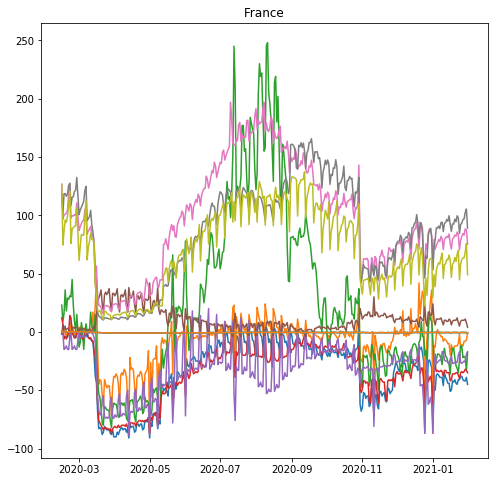

In [48]:
fields_to_plot = ['g_retail_recreation', 'g_grocery_pharmacy', 'g_parks', 'g_transit_stations',
                  'g_workplaces', 'g_residential', 'apple_driving', 'apple_transit', 'apple_walking',
                  'total_p', 'departure_p', 'arrival_p']
plt.figure(figsize=(8,8))
plt.plot(data_FR[fields_to_plot])
plt.title('France')

Text(0.5, 1.0, 'France')

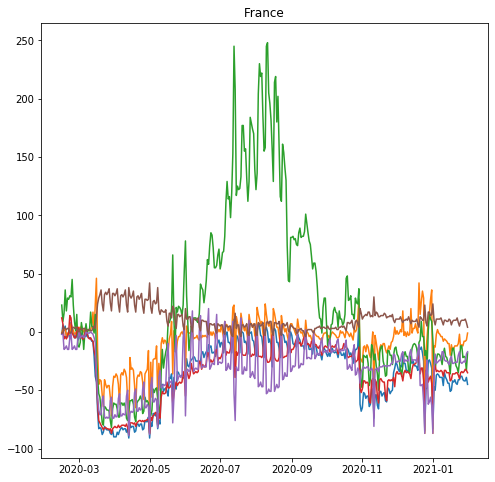

In [20]:
fields_to_plot = ['g_retail_recreation', 'g_grocery_pharmacy', 'g_parks', 'g_transit_stations',
                  'g_workplaces', 'g_residential']
plt.figure(figsize=(8,8))
plt.plot(data_FR[fields_to_plot])
plt.title('France')

Text(0.5, 1.0, 'France')

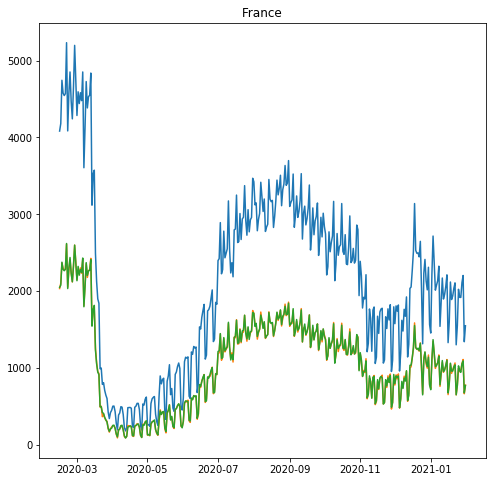

In [49]:
fields_to_plot = ['total_flt', 'departure', 'arrival']
plt.figure(figsize=(8,8))
plt.plot(data_FR[fields_to_plot])
plt.title('France')

Text(0.5, 1.0, 'UK')

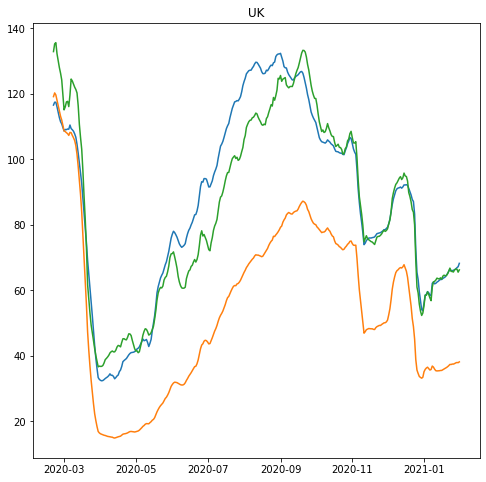

In [61]:
fields_to_plot = ['apple_driving_ma', 'apple_transit_ma', 'apple_walking_ma']
plt.figure(figsize=(8,8))
plt.plot(data_UK[fields_to_plot])
plt.title('UK')

In [50]:
data_FR['total_p'] = data_FR['total_p'] *100
data_FR

,region,g_retail_recreation,g_grocery_pharmacy,g_parks,g_transit_stations,g_workplaces,g_residential,apple_driving,apple_transit,apple_walking,...,g_residential_ma,apple_driving_ma,apple_transit_ma,apple_walking_ma,departure_ma,arrival_ma,total_flt_ma,departure_p_ma,arrival_p_ma,total_p_ma
date,,,,,,,,,,,,,,,,,,,,,
2020-02-15,France,-2,-1.0,23.0,12,-2.0,-1.0,126.610000,117.340000,126.340000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-16,France,6,2.0,9.0,7,-1.0,-1.0,96.709999,101.790000,74.440002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-17,France,1,2.0,16.0,-6,-15.0,4.0,100.320000,118.540000,86.900002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-18,France,5,2.0,36.0,-4,-14.0,3.0,100.830000,118.540000,95.910004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-19,France,-4,-3.0,18.0,-6,-12.0,2.0,102.030000,116.320000,94.029999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-27,France,-41,-12.0,-22.0,-35,-26.0,10.0,84.400002,96.300003,63.419998,...,9.142858,80.801430,93.961426,60.784286,919.85712,917.42859,1837.2858,-0.566416,-0.565966,-0.566205
2021-01-28,France,-42,-8.0,-21.0,-34,-25.0,10.0,83.050003,96.820000,63.560001,...,9.142858,80.952858,94.307144,61.235714,924.71429,923.14288,1847.8572,-0.562835,-0.560913,-0.561877
2021-01-29,France,-42,-8.0,-22.0,-32,-26.0,11.0,88.419998,102.590000,68.540001,...,9.000000,81.347145,94.739998,61.494286,931.14288,930.42859,1861.5714,-0.558940,-0.558236,-0.558593


Text(0.5, 1.0, 'France')

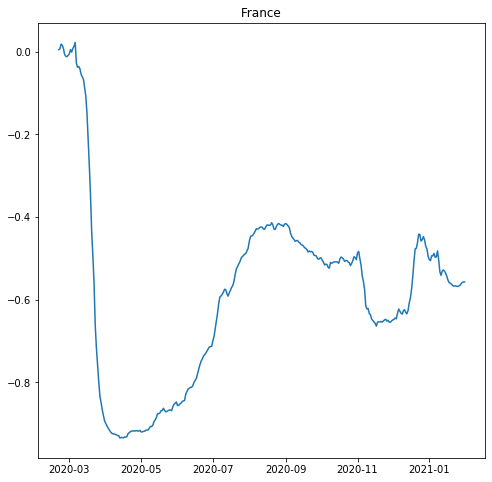

In [62]:
fields_to_plot = ['total_p_ma']
plt.figure(figsize=(8,8))
plt.plot(data_FR[fields_to_plot])
plt.title('France')

Text(0.5, 1.0, 'France')

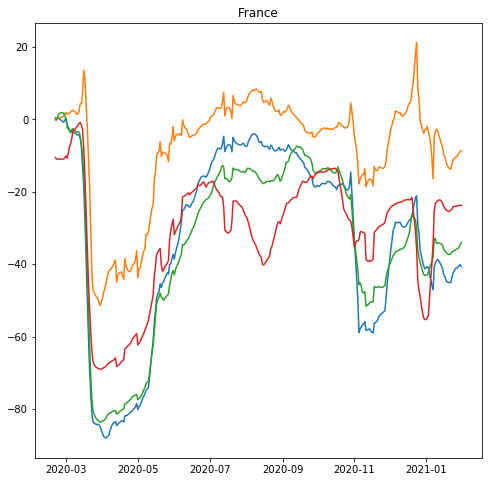

In [55]:
fields_to_plot = ['g_retail_recreation_ma', 'g_grocery_pharmacy_ma', 'g_transit_stations_ma',
                  'g_workplaces_ma']
plt.figure(figsize=(8,8))
plt.plot(data_FR[fields_to_plot])
plt.title('France')

In [56]:
data_UK['date']=pd.to_datetime(data_UK['date'])
data_UK = data_UK.set_index(['date'])

/Users/cyl/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'UK')

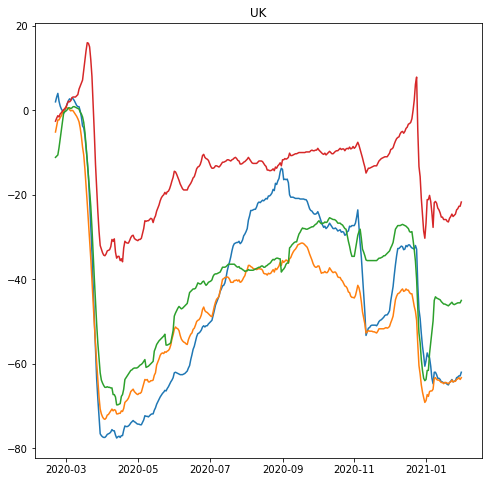

In [59]:
fields_to_plot = ['g_retail_recreation_ma', 'g_transit_stations_ma',
                  'g_workplaces_ma', 'g_grocery_pharmacy_ma']
plt.figure(figsize=(8,8))
plt.plot(data_UK[fields_to_plot])
plt.title('UK')

In [78]:
pca_fields = ['g_retail_recreation_ma', 'g_grocery_pharmacy_ma', 'g_parks_ma', 'g_transit_stations_ma',
              'g_workplaces_ma', 'apple_driving_ma', 'apple_walking_ma',
              'total_p_ma', 'departure_p_ma', 'arrival_p_ma']


data_use_com = data_use.dropna(subset=pca_fields)
data_use_com

,region,g_retail_recreation,g_grocery_pharmacy,g_parks,g_transit_stations,g_workplaces,g_residential,apple_driving,apple_transit,apple_walking,...,g_residential_ma,apple_driving_ma,apple_transit_ma,apple_walking_ma,departure_ma,arrival_ma,total_flt_ma,departure_p_ma,arrival_p_ma,total_p_ma
date,,,,,,,,,,,,,,,,,,,,,
2020-02-21,Austria,1,4.0,7.0,-2,-5.0,1.0,142.350010,NaN,142.399990,...,-0.285714,126.237140,NaN,133.112850,498.42856,496.85715,995.28571,0.046123,0.045864,0.045461
2020-02-22,Austria,9,3.0,52.0,14,2.0,-2.0,156.990010,NaN,166.410000,...,-0.285714,125.957150,NaN,133.270000,499.42856,499.00000,998.42859,0.041084,0.043730,0.041900
2020-02-23,Austria,4,23.0,4.0,5,2.0,0.0,114.150000,NaN,114.700000,...,0.000000,125.090000,NaN,133.405720,502.42856,503.85715,1006.28570,0.046766,0.054354,0.050114
2020-02-24,Austria,9,10.0,25.0,3,2.0,-1.0,111.170000,NaN,125.950000,...,-0.142857,124.748570,NaN,133.491420,504.14285,504.85715,1009.00000,0.044148,0.045379,0.044516
2020-02-25,Austria,13,10.0,60.0,7,0.0,0.0,109.000000,NaN,125.660000,...,-0.142857,124.107150,NaN,133.232850,505.85715,507.42856,1013.28570,0.047301,0.051218,0.049037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-27,United Kingdom,-60,-21.0,-13.0,-63,-50.0,20.0,69.300003,38.439999,66.500000,...,18.000000,66.290001,37.660000,66.304283,433.57144,431.57144,865.14288,-0.821527,-0.822487,-0.822007
2021-01-28,United Kingdom,-61,-21.0,-12.0,-63,-50.0,20.0,71.010002,38.820000,67.160004,...,18.000000,66.574287,37.869999,66.497147,435.00000,433.28571,868.28571,-0.821159,-0.822240,-0.821699
2021-01-29,United Kingdom,-60,-16.0,-11.0,-61,-49.0,20.0,78.349998,39.270000,76.300003,...,17.857143,66.949997,37.991428,66.474289,430.57144,431.57144,862.14288,-0.823966,-0.823357,-0.823664


[8.40496253e-01 8.68932108e-02 4.78582757e-02 1.47910873e-02
 5.00901017e-03 2.84839683e-03 2.09806863e-03 5.69544372e-06
 2.49497223e-09 9.16348461e-12]


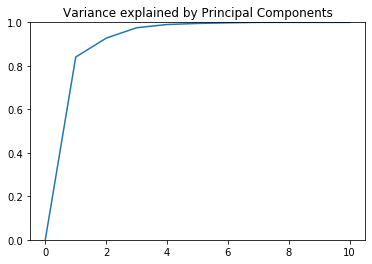

In [79]:
# PCA analysis

# PCA based on 'g_retail_recreation_ma', 'g_grocery_pharmacy_ma', 'g_parks_ma', 'g_transit_stations_ma',
#              'g_workplaces_ma', 'apple_driving_ma', 'apple_transit_ma', 'apple_walking_ma',
#              'total_p_ma', 'departure_p_ma', 'arrival_p_ma'

# pca_fields = ['g_retail_recreation_ma', 'g_grocery_pharmacy_ma', 'g_parks_ma', 'g_transit_stations_ma',
#              'g_workplaces_ma', 'apple_driving_ma', 'apple_transit_ma', 'apple_walking_ma',
#              'total_p_ma', 'departure_p_ma', 'arrival_p_ma']

pca = PCA()
res = pca.fit(data_use_com[pca_fields])
print(res.explained_variance_ratio_)
plt.plot(range(len(res.explained_variance_ratio_) + 1), np.insert(res.explained_variance_ratio_.cumsum(), 0, 0))
plt.ylim([0,1])
plt.title('Variance explained by Principal Components')

principal_components = res.transform(data_use_com[pca_fields])
n_components = 5
principal_components_dat = pd.DataFrame(principal_components[:,0:n_components], 
                                        columns=['pca_' + str(i) for i in range(n_components)])

In [83]:
print(principal_components_dat)
data_use_reindex = data_use_com.reset_index()
final_EU_pca = pd.concat([data_use_reindex, principal_components_dat], axis=1)
final_EU_pca

          pca_0      pca_1      pca_2     pca_3     pca_4
0     41.243138  49.409653 -32.650215 -6.168196 -6.786332
1     42.131524  48.472847 -32.916663 -6.884667 -6.630614
2     38.024841  52.127066 -31.458396 -6.463644 -5.587745
3     37.145419  53.415830 -31.949527 -6.727454 -4.936696
4     38.778102  51.405692 -33.381718 -8.037388 -4.805343
...         ...        ...        ...       ...       ...
7827 -76.555122  -4.036891  35.455786  2.288049  2.235943
7828 -76.750379  -3.134888  35.289850  2.534237  2.461839
7829 -77.130571  -2.077349  34.870536  2.978436  2.895797
7830 -79.739152   0.094558  34.812808  4.445240  3.149674
7831 -78.401445   0.940886  33.914681  4.673930  3.764226

[7832 rows x 5 columns]


,date,region,g_retail_recreation,g_grocery_pharmacy,g_parks,g_transit_stations,g_workplaces,g_residential,apple_driving,apple_transit,...,arrival_ma,total_flt_ma,departure_p_ma,arrival_p_ma,total_p_ma,pca_0,pca_1,pca_2,pca_3,pca_4
0,2020-02-21,Austria,1,4.0,7.0,-2,-5.0,1.0,142.350010,NaN,...,496.85715,995.28571,0.046123,0.045864,0.045461,41.243138,49.409653,-32.650215,-6.168196,-6.786332
1,2020-02-22,Austria,9,3.0,52.0,14,2.0,-2.0,156.990010,NaN,...,499.00000,998.42859,0.041084,0.043730,0.041900,42.131524,48.472847,-32.916663,-6.884667,-6.630614
2,2020-02-23,Austria,4,23.0,4.0,5,2.0,0.0,114.150000,NaN,...,503.85715,1006.28570,0.046766,0.054354,0.050114,38.024841,52.127066,-31.458396,-6.463644,-5.587745
3,2020-02-24,Austria,9,10.0,25.0,3,2.0,-1.0,111.170000,NaN,...,504.85715,1009.00000,0.044148,0.045379,0.044516,37.145419,53.415830,-31.949527,-6.727454,-4.936696
4,2020-02-25,Austria,13,10.0,60.0,7,0.0,0.0,109.000000,NaN,...,507.42856,1013.28570,0.047301,0.051218,0.049037,38.778102,51.405692,-33.381718,-8.037388,-4.805343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7827,2021-01-27,United Kingdom,-60,-21.0,-13.0,-63,-50.0,20.0,69.300003,38.439999,...,431.57144,865.14288,-0.821527,-0.822487,-0.822007,-76.555122,-4.036891,35.455786,2.288049,2.235943
7828,2021-01-28,United Kingdom,-61,-21.0,-12.0,-63,-50.0,20.0,71.010002,38.820000,...,433.28571,868.28571,-0.821159,-0.822240,-0.821699,-76.750379,-3.134888,35.289850,2.534237,2.461839
7829,2021-01-29,United Kingdom,-60,-16.0,-11.0,-61,-49.0,20.0,78.349998,39.270000,...,431.57144,862.14288,-0.823966,-0.823357,-0.823664,-77.130571,-2.077349,34.870536,2.978436,2.895797
7830,2021-01-30,United Kingdom,-67,-22.0,-37.0,-67,-33.0,15.0,68.309998,36.209999,...,434.85715,869.14288,-0.822692,-0.822209,-0.822453,-79.739152,0.094558,34.812808,4.445240,3.149674


In [85]:
final_EU_pca.to_csv("EU_pca.csv")

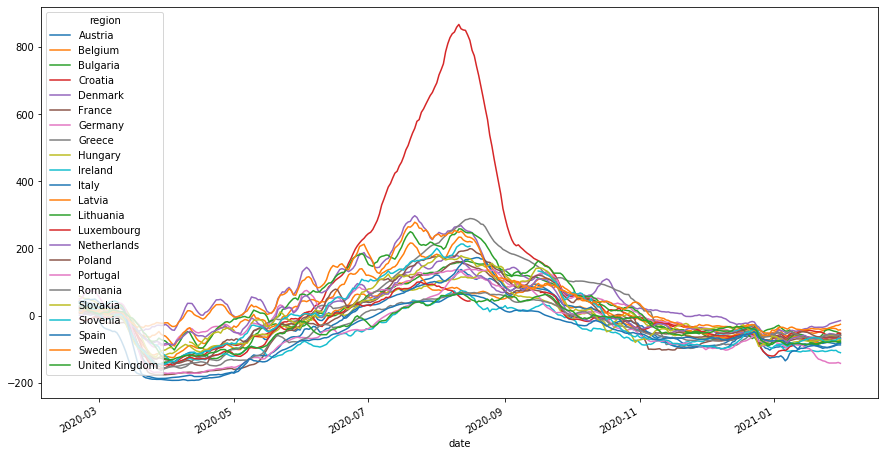

In [86]:
plt.figure(figsize=(15,8))
final_EU_pca.groupby(['date', 'region'])['pca_0'].mean().unstack().plot(ax=plt.gca())

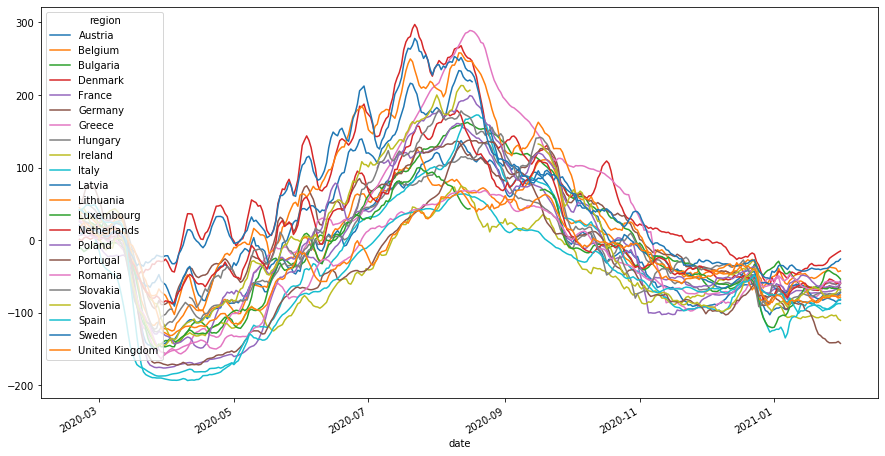

In [91]:
final_EU_noC = final_EU_pca[final_EU_pca['region']!='Croatia']
plt.figure(figsize=(15,8))
final_EU_noC.groupby(['date', 'region'])['pca_0'].mean().unstack().plot(ax=plt.gca())

In [ ]:
plt.figure(figsize=(15,8))
final_dat_pca.groupby(['Date', 'statename'])['pca_1'].mean().unstack().plot(ax=plt.gca())
state_subset = [6, 12, 29, 36, 46]
plt.figure(figsize=(15,8))
final_dat_pca.loc[final_dat_pca['statefips'].isin(state_subset)].groupby(['Date', 'statename'])['pca_0'].mean().unstack().plot(ax=plt.gca())

In [92]:
# Do it without Apple and Croatia

data = pd.read_csv("clean_EU_new.csv")
data_use = data.drop(columns=['v1'])
data_use = data_use[data_use['region']!='Croatia']
data_use['date']=pd.to_datetime(data_use['date'])
data_use = data_use.set_index(['date'])


,region,g_retail_recreation,g_grocery_pharmacy,g_parks,g_transit_stations,g_workplaces,g_residential,apple_driving,apple_transit,apple_walking,...,g_residential_ma,apple_driving_ma,apple_transit_ma,apple_walking_ma,departure_ma,arrival_ma,total_flt_ma,departure_p_ma,arrival_p_ma,total_p_ma
date,,,,,,,,,,,,,,,,,,,,,
2020-02-15,Austria,9,1.0,42.0,13,0.0,-2.0,158.950000,NaN,165.310000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-16,Austria,15,21.0,42.0,12,1.0,-2.0,120.220000,NaN,113.750000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-17,Austria,9,5.0,35.0,3,-4.0,0.0,113.560000,NaN,125.350000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-18,Austria,8,5.0,40.0,2,-4.0,0.0,113.490000,NaN,127.470000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-19,Austria,4,2.0,10.0,-1,-5.0,1.0,117.980000,NaN,125.250000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-27,United Kingdom,-60,-21.0,-13.0,-63,-50.0,20.0,69.300003,38.439999,66.500000,...,18.000000,66.290001,37.660000,66.304283,433.57144,431.57144,865.14288,-0.821527,-0.822487,-0.822007
2021-01-28,United Kingdom,-61,-21.0,-12.0,-63,-50.0,20.0,71.010002,38.820000,67.160004,...,18.000000,66.574287,37.869999,66.497147,435.00000,433.28571,868.28571,-0.821159,-0.822240,-0.821699
2021-01-29,United Kingdom,-60,-16.0,-11.0,-61,-49.0,20.0,78.349998,39.270000,76.300003,...,17.857143,66.949997,37.991428,66.474289,430.57144,431.57144,862.14288,-0.823966,-0.823357,-0.823664


In [96]:
pca_fields = ['g_retail_recreation_ma', 'g_grocery_pharmacy_ma', 'g_parks_ma', 'g_transit_stations_ma',
              'g_workplaces_ma','total_p_ma', 'departure_p_ma', 'arrival_p_ma']

data_use_com = data_use.dropna(subset=pca_fields)

[8.42829643e-01 1.32547198e-01 1.17867655e-02 7.71030129e-03
 5.11189733e-03 1.41897265e-05 5.52352879e-09 2.07250574e-11]


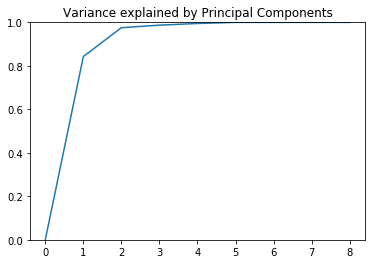

In [97]:
pca = PCA()
res = pca.fit(data_use_com[pca_fields])
print(res.explained_variance_ratio_)
plt.plot(range(len(res.explained_variance_ratio_) + 1), np.insert(res.explained_variance_ratio_.cumsum(), 0, 0))
plt.ylim([0,1])
plt.title('Variance explained by Principal Components')

principal_components = res.transform(data_use_com[pca_fields])
n_components = 5
principal_components_dat = pd.DataFrame(principal_components[:,0:n_components], 
                                        columns=['pca_' + str(i) for i in range(n_components)])

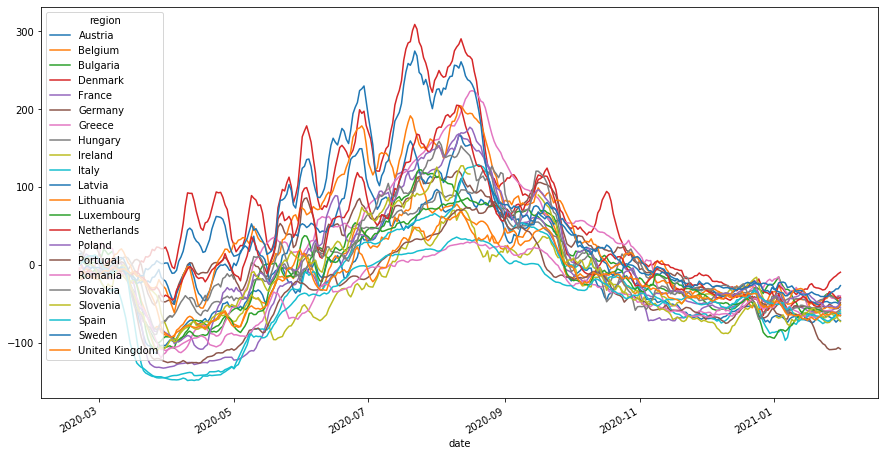

In [98]:
data_use_reindex = data_use_com.reset_index()
final_EU_pca = pd.concat([data_use_reindex, principal_components_dat], axis=1)
plt.figure(figsize=(15,8))
final_EU_pca.groupby(['date', 'region'])['pca_0'].mean().unstack().plot(ax=plt.gca())

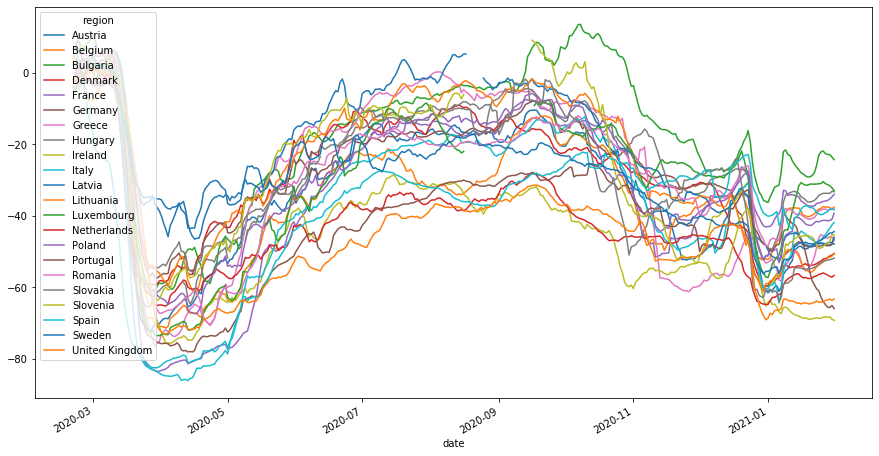

In [99]:
plt.figure(figsize=(15,8))
final_EU_pca.groupby(['date', 'region'])['g_transit_stations_ma'].mean().unstack().plot(ax=plt.gca())

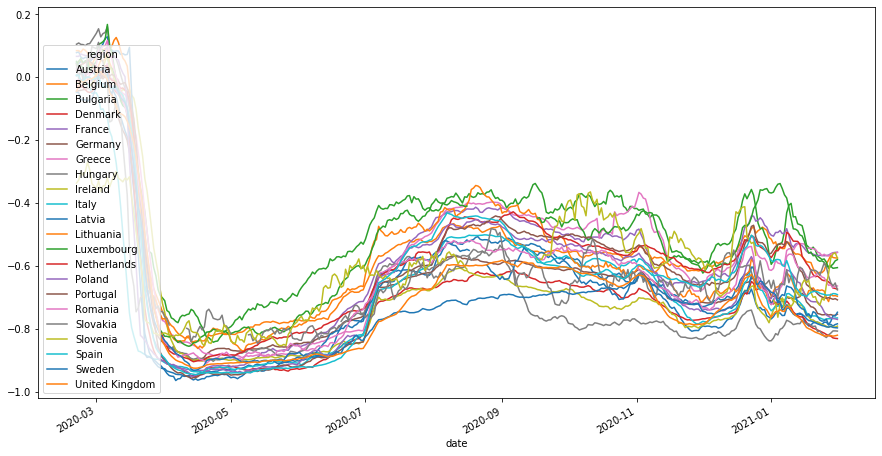

In [100]:
plt.figure(figsize=(15,8))
final_EU_pca.groupby(['date', 'region'])['total_p_ma'].mean().unstack().plot(ax=plt.gca())

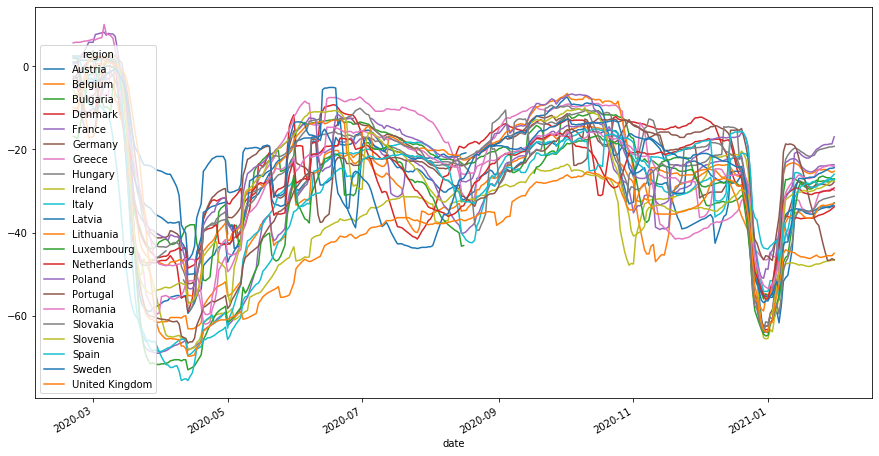

In [104]:
pca_fields = ['g_retail_recreation_ma', 'g_grocery_pharmacy_ma', 'g_transit_stations_ma',
              'g_workplaces_ma','departure_p_ma', 'arrival_p_ma']

plt.figure(figsize=(15,8))
final_EU_pca.groupby(['date', 'region'])['g_workplaces_ma'].mean().unstack().plot(ax=plt.gca())

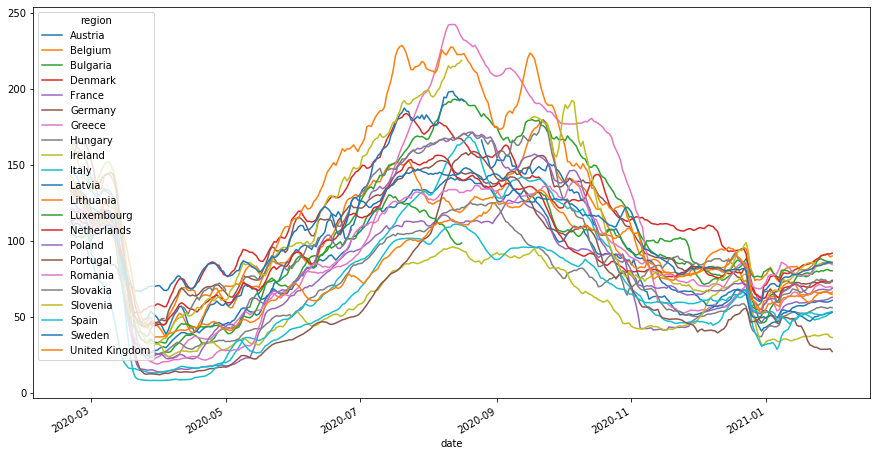

In [108]:
pca_fields = ['apple_driving_ma', 'apple_transit_ma', 'apple_walking_ma']

plt.figure(figsize=(15,8))
final_EU_pca.groupby(['date', 'region'])['apple_walking_ma'].mean().unstack().plot(ax=plt.gca())

In [13]:
# Do it without Google parks and Croatia

data = pd.read_csv("clean_EU_new.csv")
data_use = data.drop(columns=['v1'])
data_use = data_use[data_use['region']!='Croatia']
data_use['date']=pd.to_datetime(data_use['date'])
data_use = data_use.set_index(['date'])
data_use

,region,g_retail_recreation,g_grocery_pharmacy,g_parks,g_transit_stations,g_workplaces,g_residential,apple_driving,apple_transit,apple_walking,...,g_residential_ma,apple_driving_ma,apple_transit_ma,apple_walking_ma,departure_ma,arrival_ma,total_flt_ma,departure_p_ma,arrival_p_ma,total_p_ma
date,,,,,,,,,,,,,,,,,,,,,
2020-02-15,Austria,9,1.0,42.0,13,0.0,-2.0,158.950000,NaN,165.310000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-16,Austria,15,21.0,42.0,12,1.0,-2.0,120.220000,NaN,113.750000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-17,Austria,9,5.0,35.0,3,-4.0,0.0,113.560000,NaN,125.350000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-18,Austria,8,5.0,40.0,2,-4.0,0.0,113.490000,NaN,127.470000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-19,Austria,4,2.0,10.0,-1,-5.0,1.0,117.980000,NaN,125.250000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-27,United Kingdom,-60,-21.0,-13.0,-63,-50.0,20.0,69.300003,38.439999,66.500000,...,18.000000,66.290001,37.660000,66.304283,433.57144,431.57144,865.14288,-0.821527,-0.822487,-0.822007
2021-01-28,United Kingdom,-61,-21.0,-12.0,-63,-50.0,20.0,71.010002,38.820000,67.160004,...,18.000000,66.574287,37.869999,66.497147,435.00000,433.28571,868.28571,-0.821159,-0.822240,-0.821699
2021-01-29,United Kingdom,-60,-16.0,-11.0,-61,-49.0,20.0,78.349998,39.270000,76.300003,...,17.857143,66.949997,37.991428,66.474289,430.57144,431.57144,862.14288,-0.823966,-0.823357,-0.823664


In [14]:
pca_fields = ['g_retail_recreation_ma', 'g_grocery_pharmacy_ma', 'g_transit_stations_ma',
              'g_workplaces_ma','departure_p_ma', 'arrival_p_ma']
#              , 'apple_driving_ma', 'apple_walking_ma']
#  , 
data_use_com = data_use.dropna(subset=pca_fields)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


[8.83120721e-01 4.84429042e-02 4.32017142e-02 2.51947037e-02
 3.99348725e-05 2.15547312e-08]


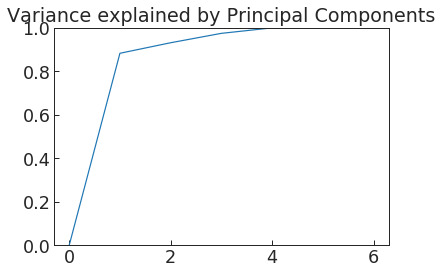

In [15]:
pca = PCA()
res = pca.fit(data_use_com[pca_fields])
print(res.explained_variance_ratio_)
plt.plot(range(len(res.explained_variance_ratio_) + 1), np.insert(res.explained_variance_ratio_.cumsum(), 0, 0))
plt.ylim([0,1])
plt.title('Variance explained by Principal Components')

principal_components = res.transform(data_use_com[pca_fields])
n_components = 3
principal_components_dat = pd.DataFrame(principal_components[:,0:n_components], 
                                        columns=['pca_' + str(i) for i in range(n_components)])

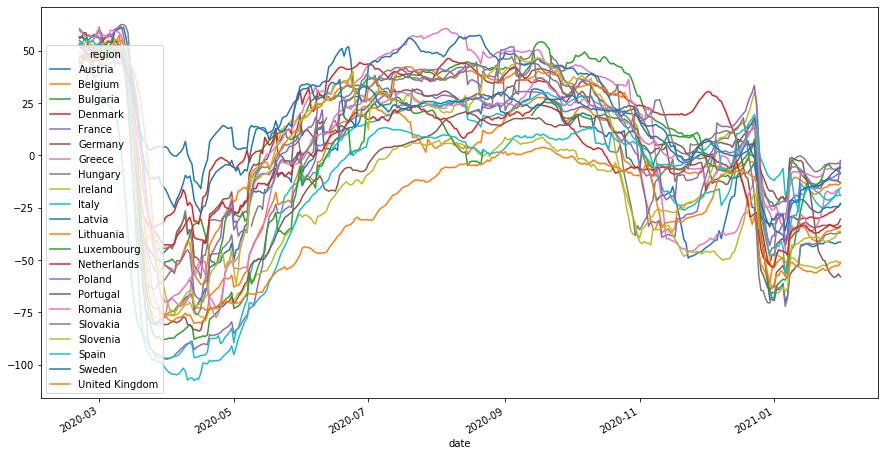

In [6]:
data_use_reindex = data_use_com.reset_index()
final_EU_pca = pd.concat([data_use_reindex, principal_components_dat], axis=1)
plt.figure(figsize=(15,8))
final_EU_pca['pca_0'] = -final_EU_pca['pca_0']
final_EU_pca.groupby(['date', 'region'])['pca_0'].mean().unstack().plot(ax=plt.gca())
final_EU_pca.to_csv("EU_pca.csv")

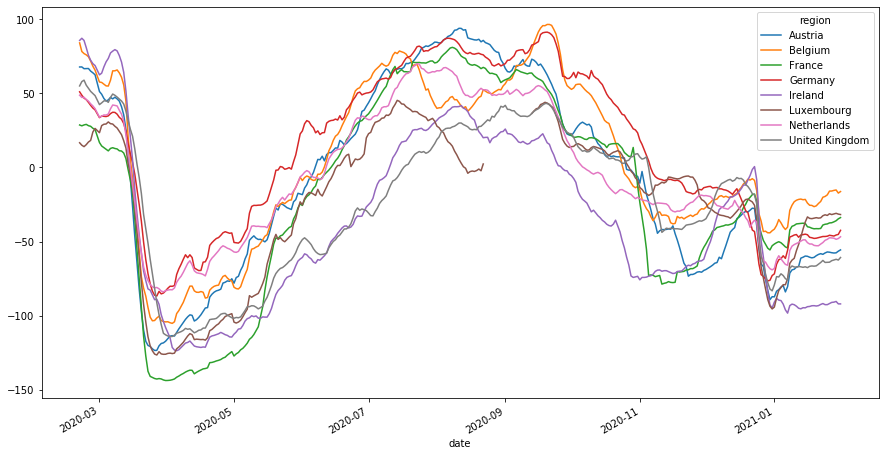

In [120]:
region_subset = ['United Kingdom', 'France', 'Germany', 'Austria', 'Belgium', 'Ireland',
                 'Liechtenstein', 'Luxembourg', 'Netherlands', 'United Kingdom']
plt.figure(figsize=(15,8))
final_EU_pca.loc[final_EU_pca['region'].isin(region_subset)].groupby(['date', 'region'])['pca_0'].mean().unstack().plot(ax=plt.gca())


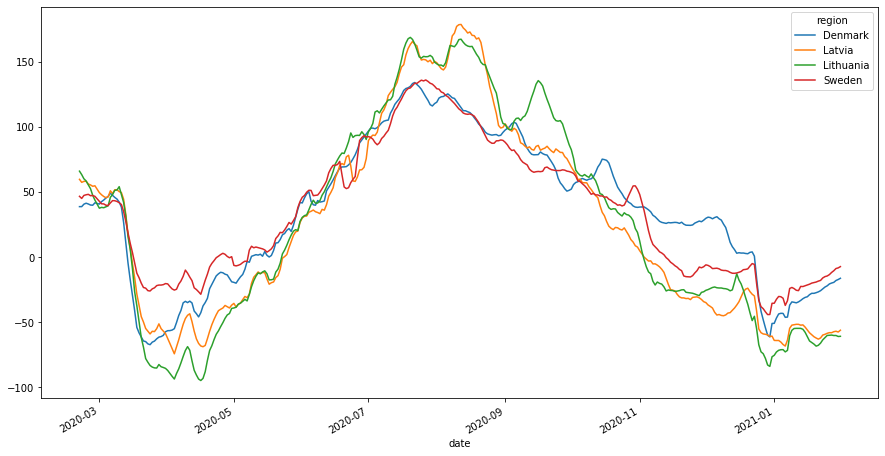

In [121]:
region_subset = ['Sweden', 'Denmark', 'Estonia', 'Latvia', 'Lithuania']
plt.figure(figsize=(15,8))
final_EU_pca.loc[final_EU_pca['region'].isin(region_subset)].groupby(['date', 'region'])['pca_0'].mean().unstack().plot(ax=plt.gca())


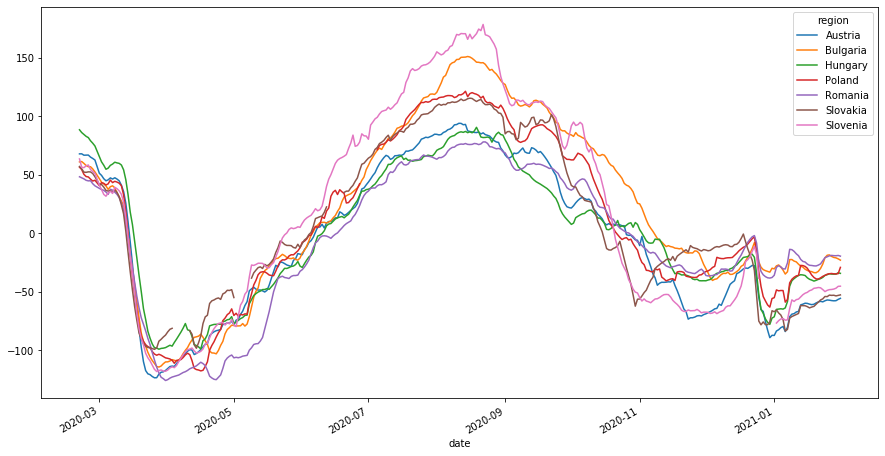

In [122]:
region_subset = ['Czech Republic', 'Austria', 'Croatia', 'Hungary', 'Poland', 'Romania', 'Slovakia', 'Slovenia', 'Bulgaria']

plt.figure(figsize=(15,8))
final_EU_pca.loc[final_EU_pca['region'].isin(region_subset)].groupby(['date', 'region'])['pca_0'].mean().unstack().plot(ax=plt.gca())


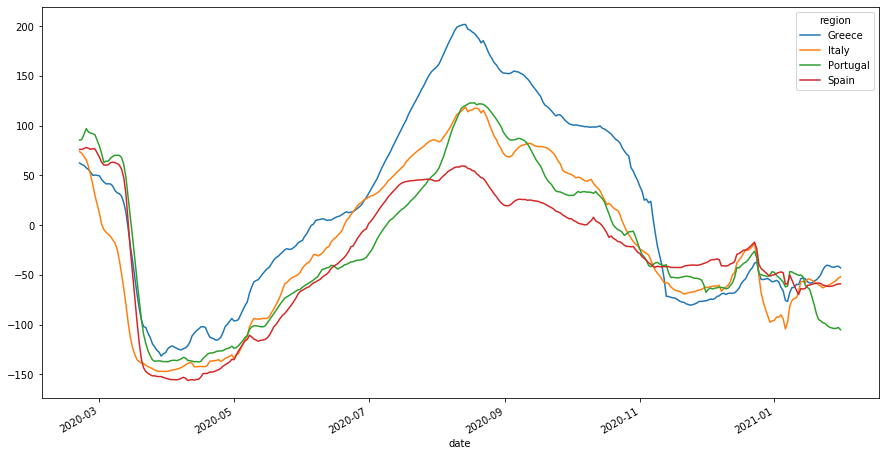

In [123]:
region_subset = ['Italy', 'Spain', 'Portugal', 'Greece']
plt.figure(figsize=(15,8))
final_EU_pca.loc[final_EU_pca['region'].isin(region_subset)].groupby(['date', 'region'])['pca_0'].mean().unstack().plot(ax=plt.gca())


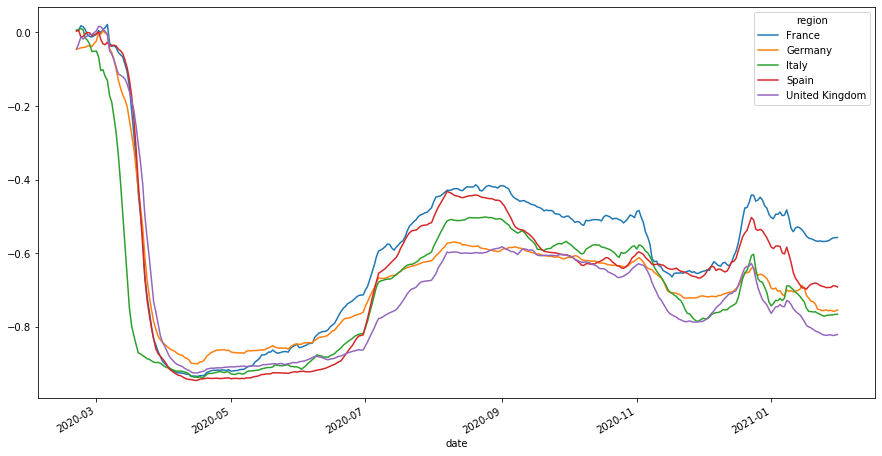

In [70]:
region_subset = ['United Kingdom', 'France', 'Germany', 'Italy', 'Spain']
plt.figure(figsize=(15,8))
final_EU_pca.loc[final_EU_pca['region'].isin(region_subset)].groupby(['date', 'region'])['total_p_ma'].mean().unstack().plot(ax=plt.gca())



findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


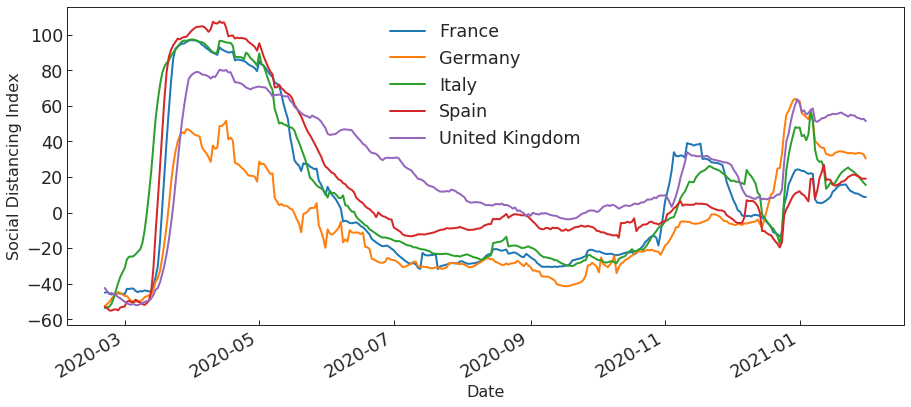

In [16]:
# [RESULTS TO USE]


fig, ax = plt.subplots(1, figsize=(15,6.5))
ax.tick_params(axis='x', which='minor', width=0.0)

state_subset = ['United Kingdom', 'France', 'Germany', 'Italy', 'Spain']
final_EU_pca['sdi'] = - final_EU_pca['pca_0']
final_EU_pca.loc[final_EU_pca['region'].isin(state_subset)].groupby(['date', 'region'])['sdi'].mean().unstack().plot(ax=plt.gca(), linewidth=2)
ax.legend(frameon=False)
ax.set_ylabel(r'Social Distancing Index', fontsize=16)
#plt.savefig('../figures/sdi_5states.eps', bbox_inches='tight')
ax.set_xlabel(r'Date', fontsize=16)
#ax.set_xticklabels(outcome_names, fontsize=14)
#ax.set_yticklabels(outcome_names, fontsize=14)
plt.savefig('SDI.eps', bbox_inches='tight')